# Building single-sample regulatory networks using LIONESS and netZooPy
### Author: 
Qi (Alex) Song*.

*Channing division of network medicine, Brigham's and Women hospital and Harvard Medical School, Boston, MA. (qi.song@channing.harvard.edu)

## 1. Introduction
In this tutorial, we will briefly walk through the steps to perform analysis with Lioness algorithm using netZooPy package. Lioness is an algorithm for estimating sample-specific gene regualtory networks in a population.  LIONESS infers individual sample networks by applying linear interpolation to the predictions made by existing aggregate network inference approaches [1]. In this tutorial, we will use Panda as our basic network inference apporach to build sample-specific networks.

## 2. Installation of netZooPy.
netZooPy comes with full support for Lioness algorithm. netZooPy can be installed through `pip` command. For more details, please refer to the installation guide at netZooPy documentation site [here](https://netzoopy.readthedocs.io/en/latest/install/index.html).    

## 3. Load required modules
We will need `Panda` and `Lioness` python classes from netZooPy package. We will also need `read_csv()` function from `pandas` package for demonstrating the input data sets.

In [2]:
from netZooPy.panda import Panda
from netZooPy.lioness import Lioness
from netZooPy.lioness.analyze_lioness import AnalyzeLioness
import pandas as pd

## 4. Load input data

Now let's look at the three data sets to get a sense about what the inputs look like.

In [3]:
exp_data = pd.read_csv('~/netZooPy/tests/puma/ToyData/ToyExpressionData.txt',header=None, index_col = 0, sep = "\t")
motif_data = pd.read_csv('~/netZooPy/tests/puma/ToyData/ToyMotifData.txt',header=None, sep = "\t")
ppi_data = pd.read_csv('~/netZooPy/tests/puma/ToyData/ToyPPIData.txt',header=None, sep = "\t")

Expression data is a matrix where rows are genes and columns are samples.There are 1000 genes and 50 samples in this expression dataset

In [4]:
exp_data

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
AACSL,0.141431,-4.153056,2.854971,0.413670,1.082093,1.882361,1.450223,2.130209,0.548923,0.583043,...,-4.551870,-6.645621,-3.970460,-2.041915,0.811989,0.979641,0.063161,3.652624,-2.387639,0.929521
AAK1,3.528478,-0.949701,1.039986,-1.618816,-1.228012,-0.171763,-2.822020,0.047464,-0.456019,1.134087,...,2.808942,-0.035529,0.473384,-1.971053,1.759803,3.151289,-5.189503,-0.233187,0.349614,0.704183
ABCA17P,-2.597842,3.970710,-2.809212,0.474679,-2.714377,-0.474146,-6.738092,-2.811364,-1.017466,-1.646993,...,-2.324379,-0.999586,0.987566,2.591347,-1.445705,-2.788339,2.295727,0.953828,-1.094031,-2.104951
ABCB8,0.352052,-1.866545,-0.007765,3.289632,2.675149,3.819294,0.668285,2.608310,3.342104,-2.792534,...,-3.666569,-0.074404,4.630231,0.883074,-1.573444,4.909868,0.866853,2.374492,1.410069,-3.828003
ABCC1,-4.638927,2.440799,-1.655580,0.506424,3.289914,2.460479,-1.003678,1.537393,-1.342323,-1.003316,...,-0.375289,-3.214583,5.531917,-1.693335,1.506472,1.020980,4.933972,2.268159,-0.734398,-2.618825
ABCF3,3.822458,0.241117,-0.629730,-6.448074,-2.221022,0.559189,-0.817507,0.404023,-2.105254,6.397036,...,0.416917,-1.061398,4.559200,-1.014232,0.372768,1.563113,2.331843,7.556858,1.705383,-1.658708
ABCG1,0.562681,0.348409,-1.800319,-3.869393,6.949607,-0.700023,0.613762,-0.194774,0.477825,1.010311,...,-6.687904,-2.232982,-3.412368,-2.943314,-2.985734,1.551215,1.133610,0.454167,-2.928591,2.399636
ACOT2,2.411224,-4.461962,2.932685,-3.482673,1.622149,1.970574,3.783328,2.018564,-4.157278,-0.454352,...,3.496161,-4.542483,1.584941,-0.167026,-1.091618,0.266757,0.242896,-1.986338,1.453353,-3.237589
ACSF2,0.452929,2.932288,2.580745,0.576073,1.568796,-3.090774,-2.057883,-5.726421,-5.013427,1.913956,...,-3.264008,0.828671,0.139710,-0.038387,1.705630,5.832881,-0.075640,-3.998545,-0.008504,-0.974825


Motif data should be formatted into a three-column list, where first column contains TF IDs and second column the target gene IDs and third column the interaction scores. 

In [5]:
motif_data

,0,1,2
0,AHR,41157,1.0
1,AHR,AAK1,1.0
2,AHR,ABCA17P,1.0
3,AHR,ABCB8,1.0
4,AHR,ABCC1,1.0
5,AHR,ABCF3,1.0
6,AHR,ABCG1,1.0
7,AHR,ADAM2,1.0
8,AHR,ADAMTS10,1.0
9,AHR,ADAMTS8,1.0


There are 87 unique TFs and 913 unique motifs in this motif dataset.

In [6]:
motif_data[0].unique().shape[0]

87

In [7]:
motif_data[1].unique().shape[0]

913

PPI (protein protein interaction) data should be formatted into a three-column list, where first two columns contain protein IDs and third column contains a score for each interaction

In [9]:
pd.concat([ppi_data[0],ppi_data[1]]).unique().size

87

This PPI dataset has 238 interactions among 87 TFs.

## 5. Run Panda
Before running Lioness, we will first need to generate a `Panda` object. This will be used later to run `Lioness`. Note that the argument `keep_expression_matrix` should be specified as `True`. As Lioness iteractions need to call Panda function to build networks, which needs expression matrix as input. 

In [16]:
panda_obj = Panda('~/netZooPy/tests/puma/ToyData/ToyExpressionData.txt',
                  '~/netZooPy/tests/puma/ToyData/ToyMotifData.txt',
                  '~/netZooPy/tests/puma/ToyData/ToyPPIData.txt',
                  remove_missing=False, 
                  keep_expression_matrix=True, save_memory=False)

Loading motif data ...
  Elapsed time: 0.02 sec.
Loading expression data ...
  Elapsed time: 0.02 sec.
Loading PPI data ...
Number of PPIs: 238
  Elapsed time: 0.00 sec.
Calculating coexpression network ...
  Elapsed time: 0.01 sec.
Creating motif network ...
  Elapsed time: 0.01 sec.
Creating PPI network ...
  Elapsed time: 0.00 sec.
Normalizing networks ...
  Elapsed time: 0.04 sec.
Saving expression matrix and normalized networks ...
  Elapsed time: 0.00 sec.
Running PANDA algorithm ...
step: 0, hamming: 0.7189662815459754
step: 1, hamming: 0.3899291546314954
step: 2, hamming: 0.4023668388969203
step: 3, hamming: 0.40052096181128466
step: 4, hamming: 0.38904060163854676
step: 5, hamming: 0.37050927774796627
step: 6, hamming: 0.346813714233211
step: 7, hamming: 0.3197200219092709
step: 8, hamming: 0.2908059296381211
step: 9, hamming: 0.2614076747991081
step: 10, hamming: 0.23256674933108332
step: 11, hamming: 0.2050473463652485
step: 12, hamming: 0.17936756642941443
step: 13, hamming

## 6. Run Lioness to estimate sample-specific networks
We will first use the `Panda` object as input for `Lioness` object. Then `Lioness` will run Panda algorithm in its iterations to estimate sample-specific network for each sample.   

In [17]:
lioness_obj = Lioness(panda_obj)

Loading input data ...
  Elapsed time: 0.00 sec.
Running LIONESS for sample 1:
Computing coexpression network:
  Elapsed time: 0.01 sec.
Normalizing networks:
  Elapsed time: 0.03 sec.
Inferring LIONESS network:
step: 0, hamming: 0.6451915130131666
step: 1, hamming: 0.6067461274659866
step: 2, hamming: 0.6105604110178084
step: 3, hamming: 0.5875350566544837
step: 4, hamming: 0.553598317095621
step: 5, hamming: 0.5130977642028344
step: 6, hamming: 0.46888897174383576
step: 7, hamming: 0.42325335262309544
step: 8, hamming: 0.3780071410446651
step: 9, hamming: 0.3345126063650471
step: 10, hamming: 0.29371889150860553
step: 11, hamming: 0.256215635375215
step: 12, hamming: 0.22230296688024526
step: 13, hamming: 0.19205902295385965
step: 14, hamming: 0.1654029965339068
step: 15, hamming: 0.14214587924488872
step: 16, hamming: 0.12203018089850885
step: 17, hamming: 0.10475927721891458
step: 18, hamming: 0.09001790128025045
step: 19, hamming: 0.07748617353400274
step: 20, hamming: 0.066849207

  Elapsed time: 0.01 sec.
Normalizing networks:
  Elapsed time: 0.02 sec.
Inferring LIONESS network:
step: 0, hamming: 0.6446007808140573
step: 1, hamming: 0.6066561612626608
step: 2, hamming: 0.6105143267305173
step: 3, hamming: 0.5875153809819786
step: 4, hamming: 0.5536025207133696
step: 5, hamming: 0.5131152115952172
step: 6, hamming: 0.468908514507496
step: 7, hamming: 0.42326886776988787
step: 8, hamming: 0.3780158211356529
step: 9, hamming: 0.3345152633298887
step: 10, hamming: 0.29371784199314155
step: 11, hamming: 0.2562128416941286
step: 12, hamming: 0.22229937209191522
step: 13, hamming: 0.1920554156626861
step: 14, hamming: 0.1653996761052681
step: 15, hamming: 0.14214304912137624
step: 16, hamming: 0.12202778290912643
step: 17, hamming: 0.10475728352365837
step: 18, hamming: 0.090016151593947
step: 19, hamming: 0.07748448858975361
step: 20, hamming: 0.06684754079961648
step: 21, hamming: 0.05780382637771552
step: 22, hamming: 0.050073651393493325
step: 23, hamming: 0.04340

step: 2, hamming: 0.6103640777269351
step: 3, hamming: 0.5873512050264047
step: 4, hamming: 0.5534219407870922
step: 5, hamming: 0.5129356817661759
step: 6, hamming: 0.46874212604373694
step: 7, hamming: 0.4231236796419835
step: 8, hamming: 0.3778956914256716
step: 9, hamming: 0.3344187635926774
step: 10, hamming: 0.2936404320381599
step: 11, hamming: 0.25615039464431727
step: 12, hamming: 0.22224837772568842
step: 13, hamming: 0.1920133441212464
step: 14, hamming: 0.16536460861948546
step: 15, hamming: 0.14211341395771593
step: 16, hamming: 0.12200253916357386
step: 17, hamming: 0.10473558500674479
step: 18, hamming: 0.0899975091761514
step: 19, hamming: 0.07746846011445685
step: 20, hamming: 0.0668337240386083
step: 21, hamming: 0.05779188696902117
step: 22, hamming: 0.05006331165089909
step: 23, hamming: 0.04339965073511143
step: 24, hamming: 0.03759319857032192
step: 25, hamming: 0.03248315937467175
step: 26, hamming: 0.02795567387570829
step: 27, hamming: 0.023936604678199185
step

  Elapsed time: 0.02 sec.
Inferring LIONESS network:
step: 0, hamming: 0.6454815045482025
step: 1, hamming: 0.6064888334615246
step: 2, hamming: 0.6103537850467549
step: 3, hamming: 0.5873467987983988
step: 4, hamming: 0.5534173891580667
step: 5, hamming: 0.5129251262883209
step: 6, hamming: 0.4687264900712108
step: 7, hamming: 0.4231036921678549
step: 8, hamming: 0.3778721072843273
step: 9, hamming: 0.33439250879973836
step: 10, hamming: 0.29361248905541215
step: 11, hamming: 0.25612178099974314
step: 12, hamming: 0.22222032595119312
step: 13, hamming: 0.19198634671852602
step: 14, hamming: 0.16533917584848357
step: 15, hamming: 0.14208990495011609
step: 16, hamming: 0.1219811952488296
step: 17, hamming: 0.10471648707194937
step: 18, hamming: 0.08998053903852753
step: 19, hamming: 0.07745350260977646
step: 20, hamming: 0.06682062957867617
step: 21, hamming: 0.05778050118366357
step: 22, hamming: 0.05005347176858947
step: 23, hamming: 0.04339119603182728
step: 24, hamming: 0.0375859556

  Elapsed time: 0.02 sec.
Inferring LIONESS network:
step: 0, hamming: 0.6453372188039735
step: 1, hamming: 0.6066676287287169
step: 2, hamming: 0.6104644764183814
step: 3, hamming: 0.5874393760760523
step: 4, hamming: 0.553506577030067
step: 5, hamming: 0.5130098317112232
step: 6, hamming: 0.46880493446531935
step: 7, hamming: 0.42317541168503864
step: 8, hamming: 0.3779353604570779
step: 9, hamming: 0.33444725718243223
step: 10, hamming: 0.2936601064819789
step: 11, hamming: 0.2561633601925414
step: 12, hamming: 0.2222568377191461
step: 13, hamming: 0.19201879569173996
step: 14, hamming: 0.16536830973066036
step: 15, hamming: 0.1421162248277369
step: 16, hamming: 0.12200488017569686
step: 17, hamming: 0.10473769975276602
step: 18, hamming: 0.08999949865507745
step: 19, hamming: 0.077470424217288
step: 20, hamming: 0.06683571528299424
step: 21, hamming: 0.057793931389394995
step: 22, hamming: 0.0500654130944078
step: 23, hamming: 0.04340179230182477
step: 24, hamming: 0.03759532580717

step: 3, hamming: 0.5874590505004481
step: 4, hamming: 0.553529311711965
step: 5, hamming: 0.5130347272475934
step: 6, hamming: 0.4688311364101988
step: 7, hamming: 0.423201202950783
step: 8, hamming: 0.3779600554810355
step: 9, hamming: 0.33447046880848674
step: 10, hamming: 0.29368153860449103
step: 11, hamming: 0.256182992647495
step: 12, hamming: 0.22227459868710234
step: 13, hamming: 0.19203454863632288
step: 14, hamming: 0.16538197139376914
step: 15, hamming: 0.14212785490634228
step: 16, hamming: 0.12201474746203654
step: 17, hamming: 0.10474604616613903
step: 18, hamming: 0.09000658579037367
step: 19, hamming: 0.07747648716459518
step: 20, hamming: 0.06684087416347566
step: 21, hamming: 0.057798285097580865
step: 22, hamming: 0.05006904051012411
step: 23, hamming: 0.04340476637970672
step: 24, hamming: 0.03759772603328491
step: 25, hamming: 0.03248712996303483
step: 26, hamming: 0.02795911898727303
step: 27, hamming: 0.023939563169657063
step: 28, hamming: 0.02038183836027533
s

step: 4, hamming: 0.5534684140947953
step: 5, hamming: 0.5129868713457605
step: 6, hamming: 0.46879289203841173
step: 7, hamming: 0.4231710646886092
step: 8, hamming: 0.37793701543032326
step: 9, hamming: 0.33445323750400024
step: 10, hamming: 0.29366868496976617
step: 11, hamming: 0.25617307269249323
step: 12, hamming: 0.22226674885043102
step: 13, hamming: 0.19202822641393982
step: 14, hamming: 0.16537671830260126
step: 15, hamming: 0.14212334810171476
step: 16, hamming: 0.1220107685282419
step: 17, hamming: 0.10474248793357537
step: 18, hamming: 0.09000330140588078
step: 19, hamming: 0.07747333480760728
step: 20, hamming: 0.06683787049330008
step: 21, hamming: 0.057795449353665554
step: 22, hamming: 0.05006637373531308
step: 23, hamming: 0.043402273765913546
step: 24, hamming: 0.037595421359931186
step: 25, hamming: 0.03248502656477798
step: 26, hamming: 0.027957229203086794
step: 27, hamming: 0.023937892823722058
step: 28, hamming: 0.02038038336070406
step: 29, hamming: 0.017252529

step: 5, hamming: 0.5130277394158711
step: 6, hamming: 0.4688217647975806
step: 7, hamming: 0.42319024909743624
step: 8, hamming: 0.3779481583579115
step: 9, hamming: 0.33445799331873677
step: 10, hamming: 0.29366902135579254
step: 11, hamming: 0.25617054999127764
step: 12, hamming: 0.22226262032373942
step: 13, hamming: 0.19202326345396328
step: 14, hamming: 0.16537148632869753
step: 15, hamming: 0.142118264201008
step: 16, hamming: 0.12200609786553841
step: 17, hamming: 0.10473832871874272
step: 18, hamming: 0.08999971271249907
step: 19, hamming: 0.07747039064766185
step: 20, hamming: 0.06683555388538216
step: 21, hamming: 0.057793686110969834
step: 22, hamming: 0.050065094270375594
step: 23, hamming: 0.04340140844053629
step: 24, hamming: 0.03759489383654498
step: 25, hamming: 0.032484760257860644
step: 26, hamming: 0.027957153083011842
step: 27, hamming: 0.02393794536063863
step: 28, hamming: 0.020380515556205
step: 29, hamming: 0.01725270067904533
step: 30, hamming: 0.014526608601

step: 5, hamming: 0.5132510551234207
step: 6, hamming: 0.4690351665376202
step: 7, hamming: 0.42338117383780194
step: 8, hamming: 0.3781135868865882
step: 9, hamming: 0.33459944752452325
step: 10, hamming: 0.2937892636785368
step: 11, hamming: 0.25627321887464255
step: 12, hamming: 0.22235047832920657
step: 13, hamming: 0.1920987613785881
step: 14, hamming: 0.16543669817665527
step: 15, hamming: 0.14217460617494096
step: 16, hamming: 0.12205478208053701
step: 17, hamming: 0.10478042130530228
step: 18, hamming: 0.09003612775603832
step: 19, hamming: 0.07750184049531986
step: 20, hamming: 0.06686269734372635
step: 21, hamming: 0.05781712126932585
step: 22, hamming: 0.050085333681801514
step: 23, hamming: 0.0434188542719053
step: 24, hamming: 0.0376098970862519
step: 25, hamming: 0.0324976193016997
step: 26, hamming: 0.027968121638909667
step: 27, hamming: 0.023947253186378716
step: 28, hamming: 0.02038837093130006
step: 29, hamming: 0.01725930031609945
step: 30, hamming: 0.01453213057480

step: 4, hamming: 0.5537181506446464
step: 5, hamming: 0.5132401622393848
step: 6, hamming: 0.46903005243019497
step: 7, hamming: 0.4233816338164551
step: 8, hamming: 0.37811730216131945
step: 9, hamming: 0.3346042764085535
step: 10, hamming: 0.29379370959045664
step: 11, hamming: 0.2562765055577094
step: 12, hamming: 0.22235228297194926
step: 13, hamming: 0.1920990888414815
step: 14, hamming: 0.16543565555984818
step: 15, hamming: 0.14217249050227085
step: 16, hamming: 0.12205187338509321
step: 17, hamming: 0.10477697957160514
step: 18, hamming: 0.09003236276240752
step: 19, hamming: 0.07749793593084385
step: 20, hamming: 0.06685876647177448
step: 21, hamming: 0.057813243887915165
step: 22, hamming: 0.0500815676624227
step: 23, hamming: 0.04341524699674484
step: 24, hamming: 0.03760647449990497
step: 25, hamming: 0.032494402723185246
step: 26, hamming: 0.027965137026658638
step: 27, hamming: 0.023944516079917964
step: 28, hamming: 0.020385898620171303
step: 29, hamming: 0.017257096090

step: 5, hamming: 0.5131442161431156
step: 6, hamming: 0.46893158026561005
step: 7, hamming: 0.42328943886764275
step: 8, hamming: 0.3780348238806755
step: 9, hamming: 0.3345325891631173
step: 10, hamming: 0.2937325823349309
step: 11, hamming: 0.2562249355349886
step: 12, hamming: 0.22230910059206208
step: 13, hamming: 0.1920630661505349
step: 14, hamming: 0.16540567166944584
step: 15, hamming: 0.142147668817602
step: 16, hamming: 0.12203143924750816
step: 17, hamming: 0.10476020433355153
step: 18, hamming: 0.09001866866683568
step: 19, hamming: 0.07748681890195008
step: 20, hamming: 0.06684977392071134
step: 21, hamming: 0.0578060040584336
step: 22, hamming: 0.050075759807870907
step: 23, hamming: 0.043410587150283765
step: 24, hamming: 0.037602741756048684
step: 25, hamming: 0.03249142680963005
step: 26, hamming: 0.02796277245679931
step: 27, hamming: 0.023942649977909784
step: 28, hamming: 0.0203844295732805
step: 29, hamming: 0.017255942798246854
step: 30, hamming: 0.01452928673937

step: 0, hamming: 0.6451609513913849
step: 1, hamming: 0.60682301694336
step: 2, hamming: 0.6106083346123937
step: 3, hamming: 0.5875838988028538
step: 4, hamming: 0.5536474918555495
step: 5, hamming: 0.5131464111654228
step: 6, hamming: 0.46893531465023547
step: 7, hamming: 0.4232953952543082
step: 8, hamming: 0.3780435892681105
step: 9, hamming: 0.33454365128594743
step: 10, hamming: 0.29374508748769934
step: 11, hamming: 0.2562377909089144
step: 12, hamming: 0.22232178821340307
step: 13, hamming: 0.19207512806462554
step: 14, hamming: 0.16541683124420956
step: 15, hamming: 0.1421577806735096
step: 16, hamming: 0.12204047685598642
step: 17, hamming: 0.10476822857697907
step: 18, hamming: 0.09002567471379647
step: 19, hamming: 0.0774928879378122
step: 20, hamming: 0.06685499297134434
step: 21, hamming: 0.05781044528986368
step: 22, hamming: 0.050079503532131836
step: 23, hamming: 0.043413743732357984
step: 24, hamming: 0.03760540071279273
step: 25, hamming: 0.03249365564796301
step: 2

step: 4, hamming: 0.5536089018867548
step: 5, hamming: 0.5130991941025524
step: 6, hamming: 0.46888336965000044
step: 7, hamming: 0.42324358671229345
step: 8, hamming: 0.37799368552636897
step: 9, hamming: 0.33449716705491805
step: 10, hamming: 0.2937026837940896
step: 11, hamming: 0.25619963891549247
step: 12, hamming: 0.22228779180603883
step: 13, hamming: 0.1920451228053333
step: 14, hamming: 0.165390605047534
step: 15, hamming: 0.14213514394319682
step: 16, hamming: 0.12202099792941383
step: 17, hamming: 0.1047515095155968
step: 18, hamming: 0.09001138629352733
step: 19, hamming: 0.0774807387620337
step: 20, hamming: 0.06684470509459199
step: 21, hamming: 0.05780176344875446
step: 22, hamming: 0.05007220261612099
step: 23, hamming: 0.0434076228109129
step: 24, hamming: 0.037600282707592456
step: 25, hamming: 0.03248939173711592
step: 26, hamming: 0.027961098540398802
step: 27, hamming: 0.023941274385556592
step: 28, hamming: 0.0203833012069568
step: 29, hamming: 0.01725501788997063

## 7. Run Lioness with co-expression matrix
Lioness can work with co-expression matrix. To compute Lioness with coexpression matrix, we can set motif data to `None`:

In [15]:
motif = None

# Make sure to keep epxression matrix for next step
panda_obj = Panda('netZooPy/tests/ToyData/ToyExpressionData.txt',
                  None,
                  'netZooPy/tests/ToyData/ToyPPIData.txt',
                  save_tmp=True,
                  remove_missing=False,
                  keep_expression_matrix=True)
lioness_obj = Lioness(panda_obj)

Loading expression data ...
Expression matrix: (1000, 50)
  Elapsed time: 0.02 sec.
Loading PPI data ...
Number of PPIs: 238
  Elapsed time: 0.01 sec.
Calculating coexpression network ...
  Elapsed time: 0.03 sec.
Returning the correlation matrix of expression data in <Panda_obj>.correlation_matrix
Loading input data ...
  Elapsed time: 0.00 sec.
Running LIONESS for sample 1:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.04 sec.
Inferring LIONESS network:
  Elapsed time: 0.00 sec.
Saving LIONESS network 1 to lioness_output using npy format:
  Elapsed time: 0.04 sec.
Running LIONESS for sample 2:
Computing coexpression network:
  Elapsed time: 0.03 sec.
Normalizing networks:
  Elapsed time: 0.18 sec.
Inferring LIONESS network:
  Elapsed time: 0.00 sec.
Saving LIONESS network 2 to lioness_output using npy format:
  Elapsed time: 0.05 sec.
Running LIONESS for sample 3:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing

Running LIONESS for sample 30:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.03 sec.
Inferring LIONESS network:
  Elapsed time: 0.00 sec.
Saving LIONESS network 30 to lioness_output using npy format:
  Elapsed time: 0.04 sec.
Running LIONESS for sample 31:
Computing coexpression network:
  Elapsed time: 0.03 sec.
Normalizing networks:
  Elapsed time: 0.04 sec.
Inferring LIONESS network:
  Elapsed time: 0.00 sec.
Saving LIONESS network 31 to lioness_output using npy format:
  Elapsed time: 0.03 sec.
Running LIONESS for sample 32:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.04 sec.
Inferring LIONESS network:
  Elapsed time: 0.00 sec.
Saving LIONESS network 32 to lioness_output using npy format:
  Elapsed time: 0.04 sec.
Running LIONESS for sample 33:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.04 sec.
Inferring LIONESS network:
  

## 8. Visualize Lioness results
AnalyzeLioness() can be used to visualize lioness network. You may select only the `top` genes to be visualized in the graph. In current version of Lioness. Only the network of the first sample will be visualized using `.top_network_plot()` function.

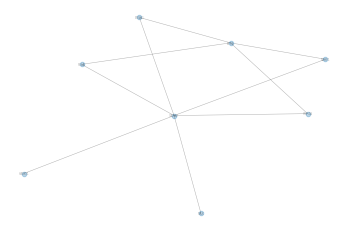

In [19]:
analyze_lioness_obj = AnalyzeLioness(lioness_obj)
analyze_lioness_obj.top_network_plot(top = 10, file = "lioness_top_10.png")

## 9. Save Lioness results
We can save Lioness results by using `save_lioness_results()` method of the `Lioness` object. The edge weights of Lioness predictions will be saved into output file. We can get TF and target IDs from the `.export_panda_results` property of `Panda` object. Each row correspond to a row in the Lioness output file.

In [20]:
panda_obj.export_panda_results

,tf,gene,motif,force
0,AHR,AACSL,0.0,-53.984356
1,AR,AACSL,0.0,27.276521
2,ARID3A,AACSL,1.0,-64.531519
3,ARNT,AACSL,1.0,-70.183704
4,BRCA1,AACSL,0.0,-57.854191
...,...,...,...,...
86995,TLX1,ZWILCH,0.0,15.673701
86996,TP53,ZWILCH,0.0,23.789647
86997,USF1,ZWILCH,0.0,-6.855873
86998,VDR,ZWILCH,0.0,20.885728


In [21]:
lioness_obj.save_lioness_results(file = 'lioness.txt')

## References
Kuijjer ML, Tung MG, Yuan GC, Quackenbush J, Glass K: Estimating Sample-Specific Regulatory Networks. iScience 2019.